In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import warnings; warnings.simplefilter('ignore')

In [2]:
Applications = pd.read_excel("Applications.xlsx")
Applications.head()

,L_id,Application_date,H_id
0,241,2021-07-26,1
1,320,2020-12-28,2
2,174,2021-01-31,13
3,80,2021-07-26,16
4,318,2021-08-24,25


In [3]:
L_SME = pd.read_excel("L_SME.xlsx")
L_SME.head()

,L_id,Company,Sector,Location,No_of_employees_being_laid_off,Unnamed: 5
0,1,"Leffler, Hodkiewicz and Runolfsdottir",Fabrication,Mumbai,49,NaN
1,2,Turner Group,Food and restaurant,Nagpur,53,NaN
2,3,Gutkowski-McClure,Food and restaurant,Mumbai,32,NaN
3,4,Kreiger Inc,Engineering,Pune,60,NaN
4,5,"Smitham, Gleason and Johnson",Retail,Nashik,89,NaN


In [4]:
H_SME = pd.read_excel("H_SME.xlsx")
H_SME.head()

,H_id,Company,Sector,Location,No_of_employees_required,Years,Ready,Start_date,End_date
0,1,Voonix,Food and restaurant,Thane,49,11,Yes,2020-07-01,2020-09-06
1,2,Snaptags,Fabrication,Nashik,53,19,Yes,2020-06-06,2021-05-30
2,3,Livefish,Health and beauty,Pune,32,4,Yes,2020-04-02,2021-01-03
3,4,Roomm,Automotive Repair,Nashik,60,12,Yes,2020-08-20,2021-07-17
4,5,Gigazoom,Retail,Pune,89,3,Yes,2020-08-11,2020-12-19


In [5]:
### check the custom list created in mockaroo. nashik and nagpur should be higher

In [6]:
Citywise_openings = H_SME.groupby(['Location']).size().reset_index(name='Locationwise').sort_values('Locationwise',
                                                                             ascending=False).head()

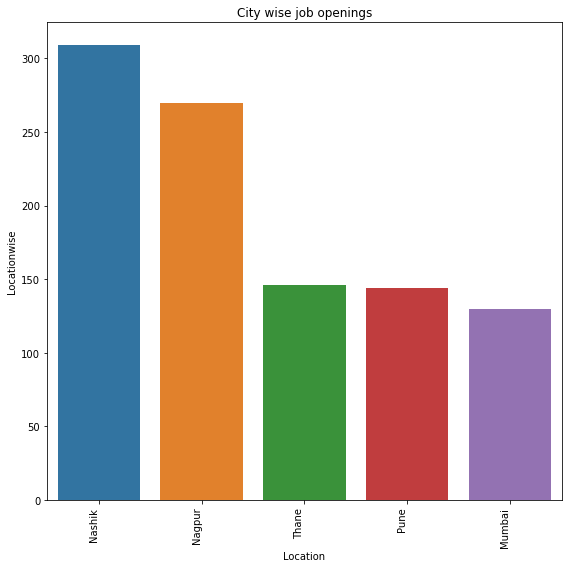

In [7]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Location", y="Locationwise", data=Citywise_openings)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job openings')
plt.tight_layout()
plt.show()

In [8]:
L_SMES_city_wise = L_SME.groupby(['Location']).size().reset_index(
    name='Locationwise').sort_values('Locationwise',ascending=False)

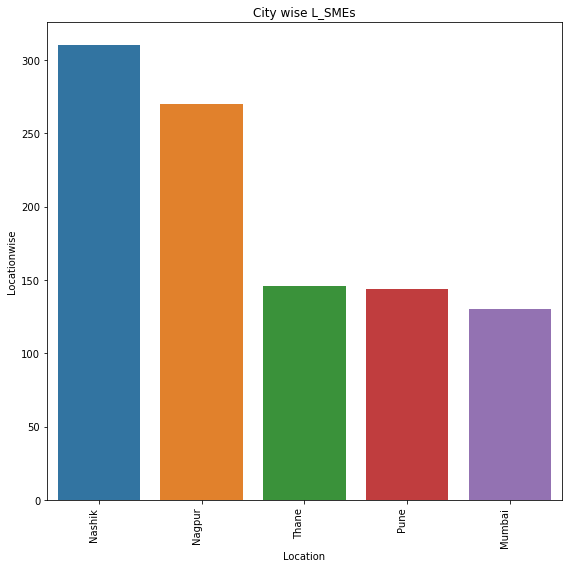

In [9]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Location", y="Locationwise",data=L_SMES_city_wise.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise L_SMEs')
plt.tight_layout()
plt.show()

##### USERBASED

In [10]:
user_based_approach = L_SME

In [11]:
user_based_approach.head()

,L_id,Company,Sector,Location,No_of_employees_being_laid_off,Unnamed: 5
0,1,"Leffler, Hodkiewicz and Runolfsdottir",Fabrication,Mumbai,49,NaN
1,2,Turner Group,Food and restaurant,Nagpur,53,NaN
2,3,Gutkowski-McClure,Food and restaurant,Mumbai,32,NaN
3,4,Kreiger Inc,Engineering,Pune,60,NaN
4,5,"Smitham, Gleason and Johnson",Retail,Nashik,89,NaN


In [12]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(user_based_approach['Location'])

In [13]:
tfidf_matrix.shape

(1000, 5)

In [14]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [15]:
cosine_sim[0]

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [16]:
user_based_approach = user_based_approach.reset_index()
userid = user_based_approach['L_id']
indices = pd.Series(user_based_approach.index, index=user_based_approach['L_id'])

In [17]:
def get_recommendations_userwise(userid):
    idx = indices[userid]
    #print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    #print (user_indices)
    return user_indices[0:11]

In [18]:
print (" Top 10 Similar users with userId: 23 ")
get_recommendations_userwise(23)

 Top 10 Similar users with userId: 23 


[4, 6, 12, 13, 14, 15, 22, 24, 29, 32, 34]

In [19]:
get_recommendations_userwise(146)

[3, 17, 20, 33, 37, 39, 40, 43, 52, 66, 70]

In [20]:
get_recommendations_userwise(2)

[1, 5, 8, 9, 10, 16, 19, 27, 28, 30, 31]

In [21]:
L_SME

,L_id,Company,Sector,Location,No_of_employees_being_laid_off,Unnamed: 5
0,1,"Leffler, Hodkiewicz and Runolfsdottir",Fabrication,Mumbai,49,NaN
1,2,Turner Group,Food and restaurant,Nagpur,53,NaN
2,3,Gutkowski-McClure,Food and restaurant,Mumbai,32,NaN
3,4,Kreiger Inc,Engineering,Pune,60,NaN
4,5,"Smitham, Gleason and Johnson",Retail,Nashik,89,NaN
...,...,...,...,...,...,...
995,996,Schuppe-Pouros,Retail,Nagpur,47,NaN
996,997,Rice-Brakus,Engineering,Nagpur,26,NaN
997,998,Parisian LLC,Fabrication,Pune,32,NaN
998,999,Mohr Group,Fabrication,Mumbai,76,NaN


In [22]:
def get_job_id(usrid_list):
    jobs_userwise = Applications['L_id'].isin(usrid_list) 
    df1 = pd.DataFrame(data = Applications[jobs_userwise], columns=['H_id'])
    joblist = df1['H_id'].tolist()
    Job_list = H_SME['H_id'].isin(joblist) 
    df_temp = pd.DataFrame(data = H_SME[Job_list], columns=['H_id','Company name','Sector','Location','Start date','End date','No. of employees required'])
    return df_temp

In [23]:
H_SME.head(10)

,H_id,Company,Sector,Location,No_of_employees_required,Years,Ready,Start_date,End_date
0,1,Voonix,Food and restaurant,Thane,49,11,Yes,2020-07-01,2020-09-06
1,2,Snaptags,Fabrication,Nashik,53,19,Yes,2020-06-06,2021-05-30
2,3,Livefish,Health and beauty,Pune,32,4,Yes,2020-04-02,2021-01-03
3,4,Roomm,Automotive Repair,Nashik,60,12,Yes,2020-08-20,2021-07-17
4,5,Gigazoom,Retail,Pune,89,3,Yes,2020-08-11,2020-12-19
5,6,Dabfeed,Automotive Repair,Nagpur,67,16,No,2020-08-26,2020-09-05
6,7,Voonte,Retail,Thane,69,2,Yes,2020-03-25,2021-06-13
7,8,Jabbercube,Engineering,Nashik,21,15,Yes,2020-03-13,2020-11-12
8,9,Wordtune,Health and beauty,Mumbai,51,1,No,2020-05-11,2020-11-17
9,10,Avavee,Food and restaurant,Nagpur,84,13,No,2020-05-26,2021-05-18


In [24]:
get_job_id(get_recommendations_userwise(2))

,H_id,Company name,Sector,Location,Start date,End date,No. of employees required
62,63,NaN,Automotive Repair,Thane,NaN,NaN,NaN
82,83,NaN,Food and restaurant,Nashik,NaN,NaN,NaN


In [25]:
L_SME[L_SME['L_id'] > 465]

,L_id,Company,Sector,Location,No_of_employees_being_laid_off,Unnamed: 5
465,466,Harber Group,Fabrication,Mumbai,50,NaN
466,467,"Gutmann, Predovic and Krajcik",Health and beauty,Thane,88,NaN
467,468,Nitzsche Inc,Automotive Repair,Mumbai,65,NaN
468,469,Schimmel-Adams,Retail,Pune,26,NaN
469,470,"Rosenbaum, Reinger and Marquardt",Engineering,Nashik,55,NaN
...,...,...,...,...,...,...
995,996,Schuppe-Pouros,Retail,Nagpur,47,NaN
996,997,Rice-Brakus,Engineering,Nagpur,26,NaN
997,998,Parisian LLC,Fabrication,Pune,32,NaN
998,999,Mohr Group,Fabrication,Mumbai,76,NaN


In [26]:
L_SME

,L_id,Company,Sector,Location,No_of_employees_being_laid_off,Unnamed: 5
0,1,"Leffler, Hodkiewicz and Runolfsdottir",Fabrication,Mumbai,49,NaN
1,2,Turner Group,Food and restaurant,Nagpur,53,NaN
2,3,Gutkowski-McClure,Food and restaurant,Mumbai,32,NaN
3,4,Kreiger Inc,Engineering,Pune,60,NaN
4,5,"Smitham, Gleason and Johnson",Retail,Nashik,89,NaN
...,...,...,...,...,...,...
995,996,Schuppe-Pouros,Retail,Nagpur,47,NaN
996,997,Rice-Brakus,Engineering,Nagpur,26,NaN
997,998,Parisian LLC,Fabrication,Pune,32,NaN
998,999,Mohr Group,Fabrication,Mumbai,76,NaN


In [28]:
get_job_id(get_recommendations_userwise(1))

,H_id,Company name,Sector,Location,Start date,End date,No. of employees required
54,55,NaN,Health and beauty,Nagpur,NaN,NaN,NaN
168,169,NaN,Retail,Mumbai,NaN,NaN,NaN


In [40]:
import pickle

In [41]:
with open('Final_model', 'wb') as f:
    pickle.dump(get_job_id,f)
    pickle.dump(get_recommendations_userwise,f)

In [42]:
with open('Final','rb') as f:
    rs = pickle.load(f)
    su = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Final'

In [56]:
from platform import python_version
print(python_version())

3.8.5
